In [471]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="white")
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.unicode_minus'] = False   


In [472]:
df = pd.read_csv("클로젯셰어_과제DB-대체-자료.csv")
df.rename(columns = {'USER': 'user'}, inplace=True)
df.head(10)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,12/6/2019,1/15/2021,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,1/2/2021,1/15/2021,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,1/2/2021,1/15/2021,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,1/2/2021,1/15/2021,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,1/1/2021,1/15/2021,7days,O,Y
5,Prada,ruffle detail long coat,a110231,10/18/2018,1/15/2021,7days,O,Y
6,Max Mara,strap basic pattern wrap-coat black,a1139960,12/26/2020,1/15/2021,7days,O,Y
7,Molliolli,pocket basic pattern fur-outer ivory,a115159,1/29/2019,1/15/2021,4days,O,Y
8,Gucci,dionysus cross bag,a1143028,1/14/2021,1/15/2021,4days,BA,Y
9,Sandro,pattern pointed cardigan black,a117306,3/2/2019,1/15/2021,7days,O,Y


In [473]:
df.shape[0] #행 개수 1471개

1471

### 살펴보기
- 브랜드 종류 245
- 굿즈 979개
- 유저 1234

In [474]:
df.describe()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,3/16/2021,3/24/2021,4days,BA,Y
freq,232,23,11,44,47,894,692,1295


### 결측치 처리와 형변환

 - 브랜드 이름 null값 존재
 - 큰 데이터 x, 클로젯셰어는 브랜드만 취급 (일단 제거)
 - reg_date, order_date -> datetime으로 형변환

In [479]:
df.loc[(df['app_yn'] != 'Y'), 'app_yn'] ='N'
df['reg_date'] = pd.to_datetime(df['reg_date'])
df['order_date'] = pd.to_datetime(df['order_date'])
df = df.dropna()
df.head(5)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y


### 데이터셋의 모든 유저가 다른 날짜에 구매한 이력이 없다.

- 모두 동일날짜에 구매
- 여러번 구매했더라도 동일날짜에 구매하였다.

In [497]:
#user, reg_date, order_date로 그루핑
grouped_df = df.groupby(by=['user', 'reg_date', 'order_date'], as_index=False).count()
grouped_df = grouped_df.loc[:, :'order_date']
grouped_df.head(5)

,user,reg_date,order_date
0,a1100548,2020-05-16,2021-03-31
1,a1100887,2020-05-19,2021-03-29
2,a1101514,2020-05-25,2021-02-05
3,a1101645,2020-05-26,2021-02-23
4,a1102068,2020-05-29,2021-03-04


In [498]:
if grouped_df['user'].nunique() == len(grouped_df['user']):
    print('유저는 전부 한 날에만 결제를 했습니다.')

유저는 전부 한 날에만 결제를 했습니다.


## 가입일로부터 구매일까지 전환된 소요시간 분석

- conv_days 컬럼 생성
- conv_days는 가입일로부터 구매일까지의 전환된 일 수
- conv_days를 1일, 3일, 1주, 2주, 1달로 5개 종류의 conv_type 생성
- 생성 후 order_date를 월별로 묶어 변화 추이를 살펴본다.

In [502]:
grouped_df['conv_days'] = (grouped_df['order_date'] - grouped_df['reg_date']).dt.days
grouped_df

,user,reg_date,order_date,conv_days
0,a1100548,2020-05-16,2021-03-31,319
1,a1100887,2020-05-19,2021-03-29,314
2,a1101514,2020-05-25,2021-02-05,256
3,a1101645,2020-05-26,2021-02-23,273
4,a1102068,2020-05-29,2021-03-04,279
...,...,...,...,...
1204,a198621,2020-04-25,2021-01-21,271
1205,a19897,2018-10-13,2021-02-16,857
1206,a199351,2020-05-03,2021-01-06,248
1207,a199421,2020-05-04,2021-02-22,294


In [503]:
#1일, 3,일 ,1주, 2주, 한달로 구분
df_conv_1day = grouped_df.query('conv_days <= 1').sort_values(by='order_date')
df_conv_3day = grouped_df.query('conv_days <= 3').sort_values(by='order_date')
df_conv_1week = grouped_df.query('conv_days <= 7').sort_values(by='order_date')
df_conv_2week = grouped_df.query('conv_days <= 14').sort_values(by='order_date')
df_conv_1month = grouped_df.query('conv_days <= 30').sort_values(by='order_date')

In [504]:
#그루핑 및 conv_type 생성 함수
def get_order_dates(df_conv, c_type):
    
    df_conv['order_ym'] = df_conv['order_date'].dt.year.astype(str) + '-' + df_conv['order_date'].dt.month.astype(str)
    df_conv = df_conv.groupby('order_ym').count()
    df_conv['conv_type'] = c_type
    df_conv = df_conv.loc[:, 'conv_days':]
    return df_conv

In [509]:
#5개 카테고리로 나노고 하나의 dataFrame으로 합친다.
df_conv = pd.concat([get_order_dates(df_conv_1day, 'groupby_1days'),
                    get_order_dates(df_conv_3day, 'groupby_3days'),
                    get_order_dates(df_conv_1week, 'groupby_1week'),
                    get_order_dates(df_conv_2week, 'groupby_2week'),
                    get_order_dates(df_conv_1month, 'groupby_1month')])
df_conv.reset_index(inplace=True)
df_conv

,order_ym,conv_days,conv_type
0,2021-1,74,groupby_1days
1,2021-2,160,groupby_1days
2,2021-3,205,groupby_1days
3,2021-1,100,groupby_3days
4,2021-2,224,groupby_3days
5,2021-3,296,groupby_3days
6,2021-1,122,groupby_1week
7,2021-2,240,groupby_1week
8,2021-3,318,groupby_1week
9,2021-1,143,groupby_2week


### 월별 분석 그래프
- 1일, 3일, 1주, 2주, 1달 전부 전환율이 높아졌다.

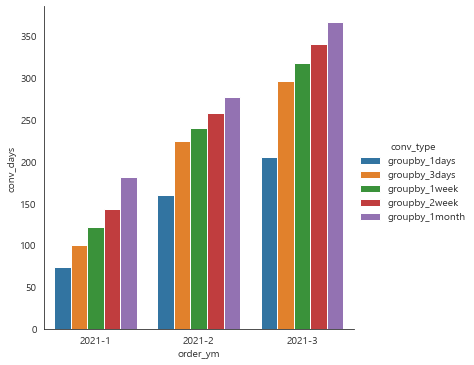

In [510]:
sns.catplot(x='order_ym', y='conv_days', kind='bar', hue ='conv_type',data=df_conv)

#### 변화량 분석을 위해 해당 값의 차이를 의미하는 change 칼럼 생성

In [511]:
df_conv['change'] = df_conv['conv_days'].pct_change()
for i in range(df_conv.shape[0]):
    
    if df_conv.iloc[i, 0] == '2021-1':
        df_conv.iloc[i, -1] = 0
df_conv

,order_ym,conv_days,conv_type,change
0,2021-1,74,groupby_1days,0.000000
1,2021-2,160,groupby_1days,1.162162
2,2021-3,205,groupby_1days,0.281250
3,2021-1,100,groupby_3days,0.000000
4,2021-2,224,groupby_3days,1.240000
5,2021-3,296,groupby_3days,0.321429
6,2021-1,122,groupby_1week,0.000000
7,2021-2,240,groupby_1week,0.967213
8,2021-3,318,groupby_1week,0.325000
9,2021-1,143,groupby_2week,0.000000


### 변화량 분석

- 1월,2월 차이 그리고 2월,3일 차이를 의미하는 그래프 전부 양수형태 (변화가 많아졌음을 의미)
- 1월 ~ 2월은 1days, 3days, 1week 에서의 변화량이 2week, month와 비교했을때보다 컸다.
- 반면 2월 ~ 3월은 모든 conv_types의 변화량이 동일
- 1월 ~2월 변화량 평균이 2월 ~3월 변화량 평균보다 컸다.

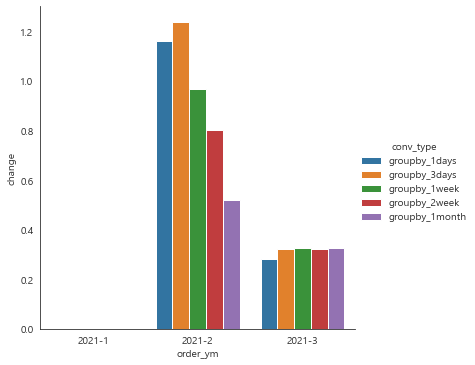

In [496]:
sns.catplot(x='order_ym', y='change', kind='bar', hue ='conv_type',data=df_conv)